# Предсказание цены биткоина 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from prophet import Prophet

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 14})

Чтение и подготовка данных

In [2]:
df = pd.read_csv('BTC-USD.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2860,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,20779.343750,22927802083
2861,2022-07-18,20781.912109,22633.033203,20781.912109,22485.689453,22485.689453,39974475562
2862,2022-07-19,22467.849609,23666.962891,21683.406250,23389.433594,23389.433594,48765202697
2863,2022-07-20,23393.191406,24196.818359,23009.949219,23231.732422,23231.732422,42932549127


In [4]:
df = df.rename(columns=lambda x: x.strip())

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df = df.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
df

,Date,Open
0,2014-09-17,465.864014
1,2014-09-18,456.859985
2,2014-09-19,424.102997
3,2014-09-20,394.673004
4,2014-09-21,408.084991
...,...,...
2860,2022-07-17,21195.041016
2861,2022-07-18,20781.912109
2862,2022-07-19,22467.849609
2863,2022-07-20,23393.191406


In [7]:
df.Date = pd.to_datetime(df.Date)

Отберем для модели более свежие значения

In [8]:
df = df.query('Date >= "2020-01-01"')

График цены биткоина с 2020-01-01 по 2022-07-21

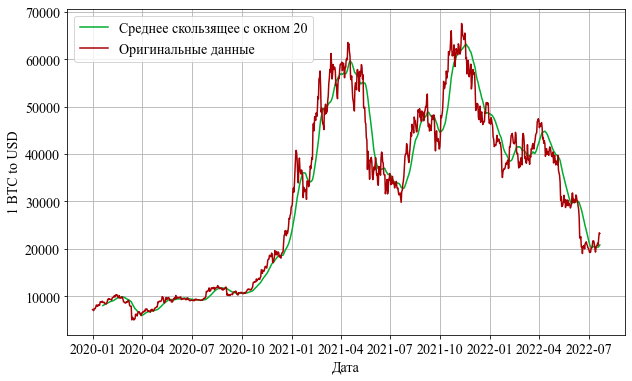

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df.Date, df.Open.rolling(20).mean(), color='#00AD2F', label='Среднее скользящее с окном 20')
plt.plot(df.Date, df.Open, color='#A80005', label='Оригинальные данные')
plt.xlabel('Дата')
plt.ylabel('1 BTC to USD')
plt.legend()
plt.grid()

In [10]:
df = df.rename(columns={'Date':'ds','Open':'y'})
df

,ds,y
1932,2020-01-01,7194.892090
1933,2020-01-02,7202.551270
1934,2020-01-03,6984.428711
1935,2020-01-04,7345.375488
1936,2020-01-05,7410.451660
...,...,...
2860,2022-07-17,21195.041016
2861,2022-07-18,20781.912109
2862,2022-07-19,22467.849609
2863,2022-07-20,23393.191406


Предскажем цену биткоина на 25 дней

In [11]:
predictions = 25
train_df = df[:-predictions] 

In [12]:
train_df

,ds,y
1932,2020-01-01,7194.892090
1933,2020-01-02,7202.551270
1934,2020-01-03,6984.428711
1935,2020-01-04,7345.375488
1936,2020-01-05,7410.451660
...,...,...
2835,2022-06-22,20719.414063
2836,2022-06-23,19986.607422
2837,2022-06-24,21084.648438
2838,2022-06-25,21233.609375


Создание модели и обучение

In [13]:
m = Prophet()
m.fit(train_df)

14:13:38 - cmdstanpy - INFO - Chain [1] start processing
14:13:38 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

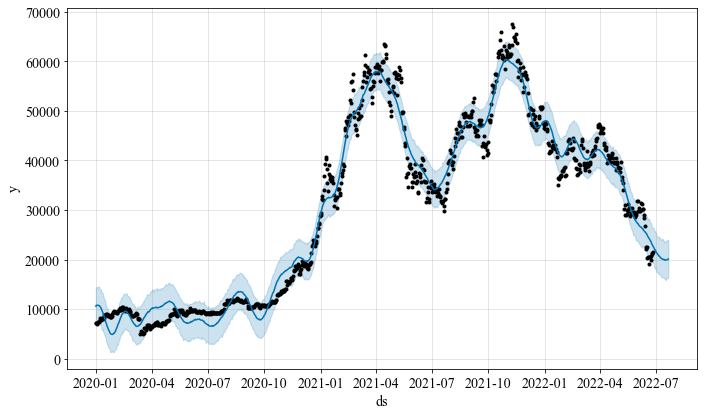

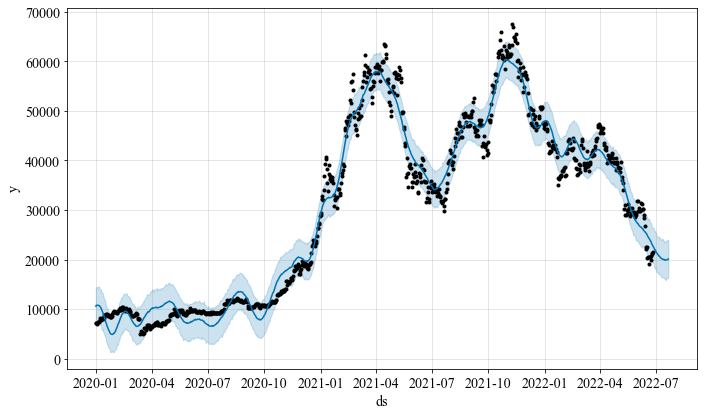

In [15]:
m.plot(forecast)

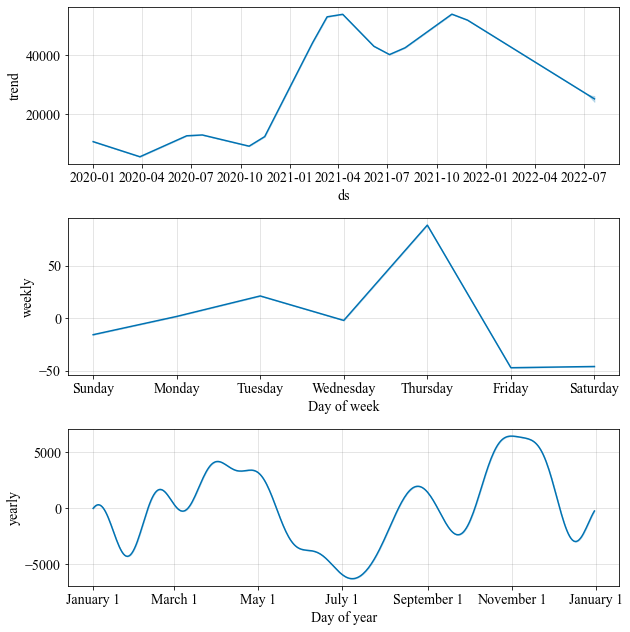

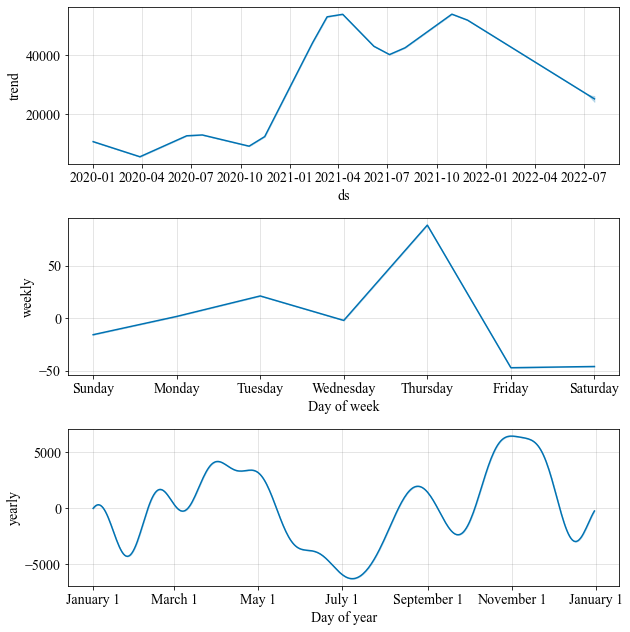

In [16]:
m.plot_components(forecast)

In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,10717.508406,7064.089416,14261.634128,10717.508406,10717.508406,-155.327611,-155.327611,-155.327611,-2.181327,-2.181327,-2.181327,-153.146284,-153.146284,-153.146284,0.0,0.0,0.0,10562.180794
1,2020-01-02,10658.496004,7174.177864,14518.185562,10658.496004,10658.496004,108.359805,108.359805,108.359805,88.417333,88.417333,88.417333,19.942471,19.942471,19.942471,0.0,0.0,0.0,10766.855809
2,2020-01-03,10599.483603,7120.223718,14339.412146,10599.483603,10599.483603,108.338958,108.338958,108.338958,-47.161694,-47.161694,-47.161694,155.500652,155.500652,155.500652,0.0,0.0,0.0,10707.822561
3,2020-01-04,10540.471202,6848.919711,14362.304709,10540.471202,10540.471202,203.391514,203.391514,203.391514,-46.005302,-46.005302,-46.005302,249.396816,249.396816,249.396816,0.0,0.0,0.0,10743.862716
4,2020-01-05,10481.458801,6753.187454,14456.319085,10481.458801,10481.458801,282.723817,282.723817,282.723817,-15.757525,-15.757525,-15.757525,298.481342,298.481342,298.481342,0.0,0.0,0.0,10764.182617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2022-07-17,25702.270710,15786.610814,23458.049204,25013.629280,26311.318194,-5803.166965,-5803.166965,-5803.166965,-15.757525,-15.757525,-15.757525,-5787.409440,-5787.409440,-5787.409440,0.0,0.0,0.0,19899.103745
929,2022-07-18,25588.835111,16267.560729,23884.282300,24819.938269,26286.666730,-5658.901111,-5658.901111,-5658.901111,1.605640,1.605640,1.605640,-5660.506751,-5660.506751,-5660.506751,0.0,0.0,0.0,19929.934000
930,2022-07-19,25475.399512,16244.336924,23840.835978,24652.714506,26256.693367,-5499.589768,-5499.589768,-5499.589768,21.082874,21.082874,21.082874,-5520.672642,-5520.672642,-5520.672642,0.0,0.0,0.0,19975.809744
931,2022-07-20,25361.963912,16236.235525,23976.054791,24465.055284,26232.184130,-5370.392480,-5370.392480,-5370.392480,-2.181327,-2.181327,-2.181327,-5368.211153,-5368.211153,-5368.211153,0.0,0.0,0.0,19991.571432


Расчет ошибки

In [18]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [19]:
cmp_df = cmp_df.reset_index()

In [20]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE, средняя относительная погрешность в % =', np.mean(abs(cmp_df[-predictions:]['p'])))
print('MAE, средняя абсолютная погрешность =', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE, средняя относительная погрешность в % = 6.425548597021049
MAE, средняя абсолютная погрешность = 1350.4752877553237


Сравнение модели и реальных данных

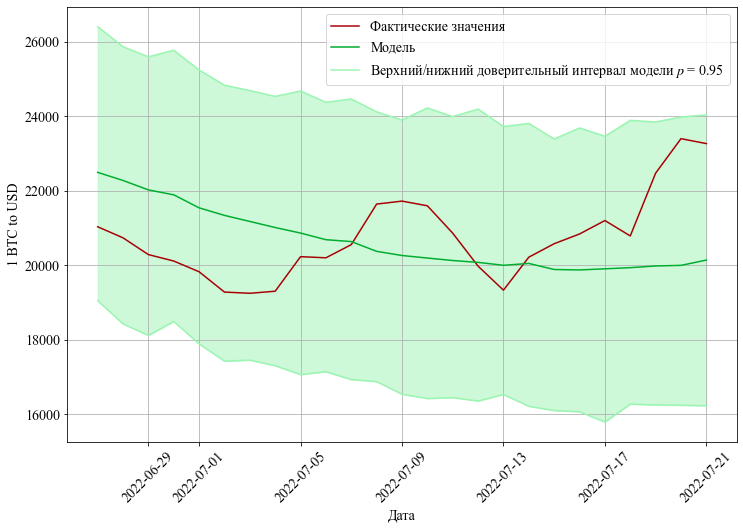

In [21]:
plt.figure(figsize=(12,8))
plt.plot(cmp_df[-predictions:].ds,cmp_df[-predictions:].y, label = 'Фактические значения', color='#A80005')
plt.plot(cmp_df[-predictions:].ds,cmp_df[-predictions:].yhat, label = 'Модель', color='#00AD2F')
plt.plot(cmp_df[-predictions:].ds,cmp_df[-predictions:].yhat_lower, 
label = 'Верхний/нижний доверительный интервал модели $p$ = 0.95', color='#9CF5B3')
plt.plot(cmp_df[-predictions:].ds,cmp_df[-predictions:].yhat_upper, color='#9CF5B3')
plt.fill_between(cmp_df[-predictions:].ds,cmp_df[-predictions:].yhat_lower,
cmp_df[-predictions:].yhat_upper, color='#9CF5B3',alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('1 BTC to USD')
plt.legend()
plt.grid()

Предсказание цены на 25 дней

In [22]:
forecast[-predictions:][['ds','yhat']]

,ds,yhat
908,2022-06-27,22488.825540
909,2022-06-28,22271.624388
910,2022-06-29,22017.897413
911,2022-06-30,21885.656834
912,2022-07-01,21536.151837
913,2022-07-02,21333.454182
914,2022-07-03,21170.938992
915,2022-07-04,21007.505809
916,2022-07-05,20858.885140
917,2022-07-06,20680.813090
